In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Data

In [2]:
np.random.seed(123456)

In [3]:
df = pd.DataFrame(columns=['x0', 'x1', 'tag'])

In [4]:
X1 = pd.DataFrame(stats.multivariate_normal([0.5, 0], [[2.0, 0.3], [0.3, 0.5]]).rvs(1000), columns=['x0', 'x1'])
df = df.append(X1, sort=False).fillna(0)

In [5]:
X2 = pd.DataFrame(stats.multivariate_normal([-3, 3], [[3.0, 2], [2, 1.5]]).rvs(1000), columns=['x0', 'x1'])
df = df.append(X2, sort=False).fillna(1)

In [6]:
X3 = pd.DataFrame(stats.multivariate_normal([-2, -5], [[0.5, 0], [0, 0.5]]).rvs(1000), columns=['x0', 'x1'])
df = df.append(X3, sort=False).fillna(2)

In [7]:
df.reset_index(inplace=True, drop=True)
df['tag'] = df['tag'].astype(np.int64)

In [8]:
df.sample(5)

,x0,x1,tag
1681,-0.532040,4.421118,1
1364,-2.414124,2.966352,1
2622,-3.160188,-5.841690,2
495,2.398159,-0.547388,0
1970,-3.088009,3.485192,1


In [9]:
X = df.loc[:,['x0','x1']].values

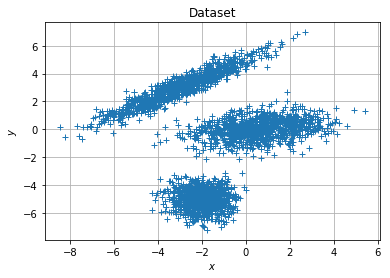

In [10]:
fig, axe = plt.subplots()
axe.plot(*X.T, '+')
axe.set_title("Dataset")
axe.set_xlabel("$x$")
axe.set_ylabel("$y$")
axe.grid()

## Preporcessed Inputs

In [11]:
df['xsum'] = df.x0+df.x1
df['xdif'] = df.x0-df.x1
df['xmul'] = df.x0*df.x1
df['xdiv'] = df.x0/df.x1

In [12]:
df.sample(5)

,x0,x1,tag,xsum,xdif,xmul,xdiv
138,2.021436,0.740198,0,2.761635,1.281238,1.496264,2.730938
2330,-2.562425,-5.013304,2,-7.575729,2.450879,12.846216,0.511125
417,1.542221,1.007027,0,2.549248,0.535194,1.553058,1.531459
2075,-2.172672,-4.768843,2,-6.941516,2.596171,10.361135,0.455597
1586,0.897829,5.509317,1,6.407146,-4.611488,4.946424,0.162966


In [13]:
df.shape

(3000, 7)

In [14]:
p = 0.75

In [15]:
train = df.copy().sample(frac=p)
test = df.copy().sample(frac=1-p)

In [16]:
print(train.shape, test.shape)

(2250, 7) (750, 7)


In [17]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [18]:
def prepare(df):
    d = df.copy()
    y = d.pop('tag').values
    enc = LabelEncoder()
    y = enc.fit_transform(y)
    y = pd.get_dummies(y).values
    x = d.values
    return x, y 

# Model

 - https://keras.io/

In [19]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
x, y = prepare(train) 
y

In [ ]:
y.shape

In [ ]:
x.shape

In [ ]:
model = Sequential()
model.add(Dense(units=24, activation='relu', input_dim=x.shape[1]))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(x, y, epochs=10, batch_size=32)

In [ ]:
xth, yth = prepare(test)

In [ ]:
loss_and_metrics = model.evaluate(xth, yth, batch_size=128)

In [ ]:
loss_and_metrics

In [ ]:
classes = model.predict(xth, batch_size=128)
pred = classes.argmax(axis=1)

In [ ]:
test['pred'] = pred
for i in range(classes.shape[1]):
    test['p(c=%d)'%i] = classes[:,i]
test['valid'] = test.pred == test.tag
bad = test[~test.valid]
bad

In [ ]:
fig, axe = plt.subplots()
groups = test.groupby('pred').groups
for k in groups:
    axe.plot(test.loc[groups[k],'x0'], test.loc[groups[k], 'x1'], '+', label='c=%d'%k)
axe.plot(bad['x0'], bad['x1'], 'x', label="bad")
axe.set_title("Dataset: Test")
axe.set_xlabel("$x_0$")
axe.set_ylabel("$x_1$")
axe.legend()
axe.grid()

In [ ]:
model.get_config()